# Classical Image Segmentation

Image segmentation is the process of partitioning an image into meaningful regions, making it easier to analyze or process. Classical segmentation techniques use traditional image processing methods without involving machine learning or deep learning.

---

## What is Image Segmentation?

Image segmentation groups pixels into segments based on certain criteria such as color, intensity, texture, shape, or spatial proximity. The goal is to simplify or change the representation of an image into something more meaningful and easier to analyze.

---

## Classical Segmentation Techniques in OpenCV

OpenCV provides several classical image segmentation methods, including:

- **Thresholding**: Segmenting based on pixel intensity.
- **Adaptive Thresholding**: Threshold values vary over the image.
- **Otsu's Thresholding**: Automatically determines threshold based on histogram.
- **Watershed Algorithm**: Treats grayscale image as a topographic surface and segments by flooding.
- **Contour Detection**: Finding boundaries of objects in images.

---

## Example: Thresholding and Contour-based Segmentation

1. Convert the image to grayscale.  
2. Apply Gaussian blur to reduce noise.  
3. Apply Canny Edge Detector or Thresholding to detect edges.  
4. Find contours to segment the objects.  
5. Draw contours or masks for segmentation.

---

## Limitations of Classical Segmentation

- Sensitive to noise and lighting variations.
- Hard-coded parameters may not generalize well.
- Less effective for complex images with overlapping objects or textures.
- Computationally efficient but limited in accuracy compared to modern methods.

---

## Summary

Classical image segmentation methods are foundational and great for simple tasks and real-time applications. However, for complex segmentation tasks, modern techniques like clustering, graph-based methods, or deep learning are more effective.

---



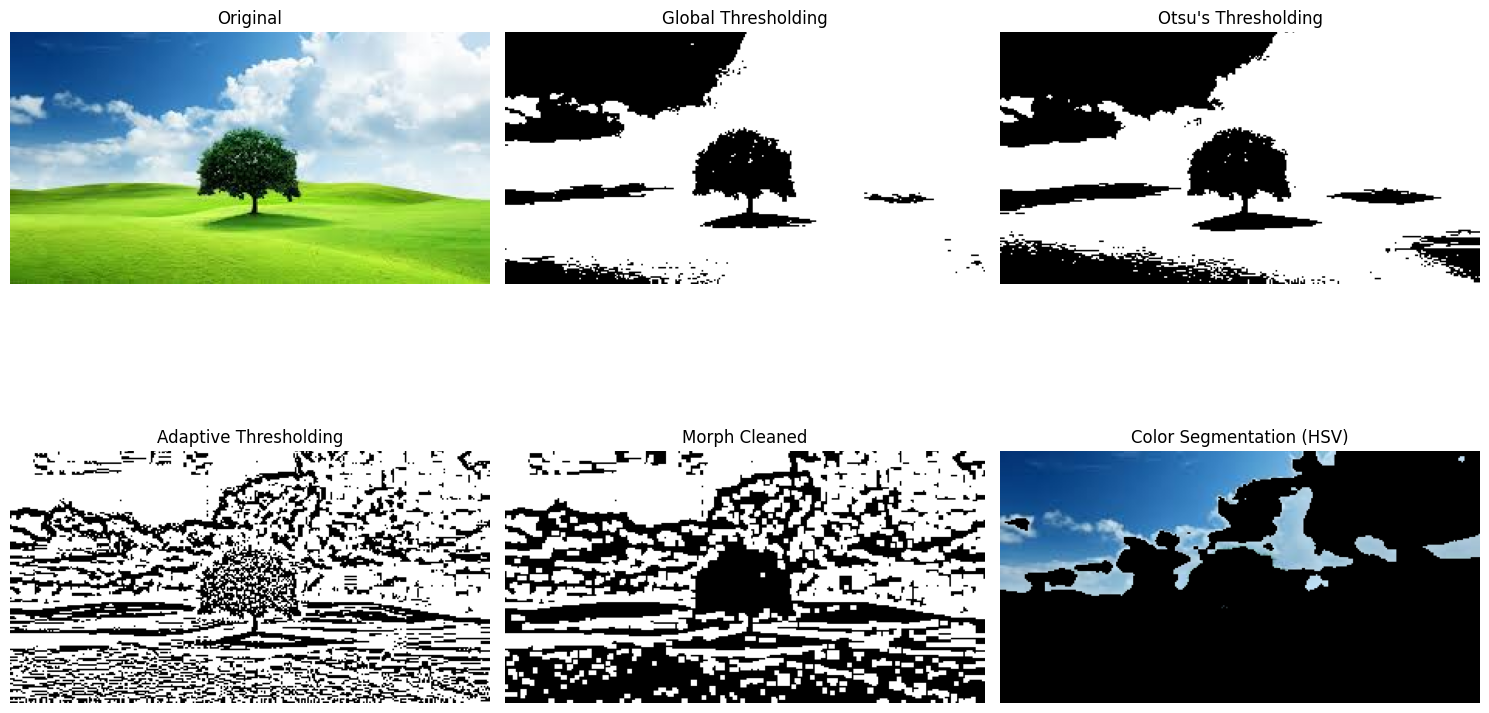

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('segment.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 1. Global Thresholding
_, global_thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# 2. Otsu's Thresholding
_, otsu_thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 3. Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(
    gray, 255, 
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY, 
    11, 2
)

# 4. Morphological Operations (cleaning noise)
kernel = np.ones((3, 3), np.uint8)
morph_cleaned = cv2.morphologyEx(adaptive_thresh, cv2.MORPH_OPEN, kernel)

# 5. Color Segmentation using HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# Define range for a color (e.g., blue)
lower = np.array([90, 50, 50])
upper = np.array([130, 255, 255])
mask = cv2.inRange(hsv, lower, upper)
color_segment = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

# 6. Plotting all results
titles = [
    "Original", 
    "Global Thresholding", 
    "Otsu's Thresholding", 
    "Adaptive Thresholding", 
    "Morph Cleaned", 
    "Color Segmentation (HSV)"
]
images = [
    image_rgb, 
    global_thresh, 
    otsu_thresh, 
    adaptive_thresh, 
    morph_cleaned, 
    color_segment
]

plt.figure(figsize=(15, 10))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.title(titles[i])
    cmap = 'gray' if i in [1, 2, 3, 4] else None
    plt.imshow(images[i], cmap=cmap)
    plt.axis('off')
plt.tight_layout()
plt.show()
